In [1]:
import uproot
import numpy as np
import awkward as ak
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import os
import numba as nb
import boost_histogram as bh
import yaml
import json
from coffea import hist as chist
from coffea.nanoevents.methods import vector

import sys
import time

from coffea.util import save
from coffea.util import load

from yty_hist_class import yty_histplot

In [2]:
def mkdir(path):
    '''
    创建指定的文件夹
    :param path: 文件夹路径，字符串格式
    :return: True(新建成功) or False(文件夹已存在，新建失败)
    '''
    # 引入模块
    import os

    # 去除首位空格
    path = path.strip()
    # 去除尾部 \ 符号
    path = path.rstrip("\\")

    # 判断路径是否存在
    # 存在     True
    # 不存在   False
    isExists = os.path.exists(path)

    # 判断结果
    if not isExists:
        # 如果不存在则创建目录
         # 创建目录操作函数
        os.makedirs(path)
        print(path + ' 创建成功')
        return True
    else:
        # 如果目录存在则不创建，并提示目录已存在
        print(path + ' 目录已存在')
        return False

newid_fake_rate_hist 目录已存在
Create type 1 hist_plot named "loose_pt".
Create type 1 hist_plot named "tight_pt".
Create type 1 hist_plot named "gen_weight_loose".
Create type 1 hist_plot named "gen_weight_loose".
Progress: 44/44	(9747,8936)	(288.97,267.41)
newid_fake_rate_hist 目录已存在
Progress: 27/27	(1944,1731)	(24.50,22.41)
newid_fake_rate_hist 目录已存在
Progress: 57/57	(117474,106190)	(234.78,214.84)
newid_fake_rate_hist 目录已存在
Progress: 946/946	(10540,3561)19,152)	(4510,1561)	(4853,1675)	(7871,2668)
newid_fake_rate_hist 目录已存在


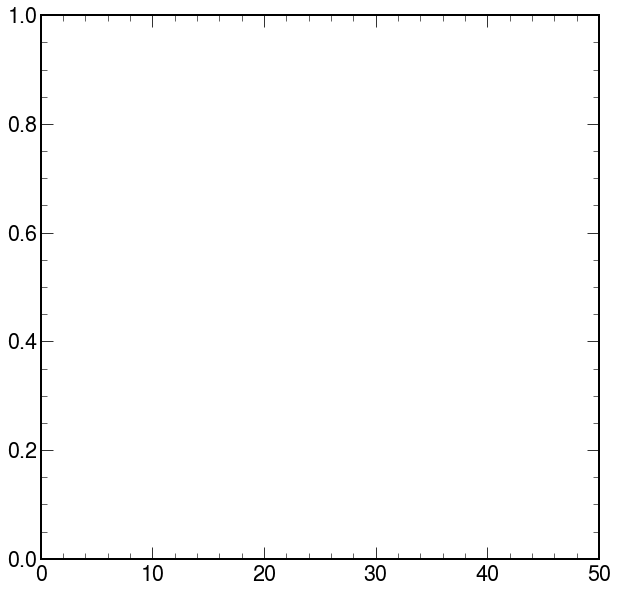

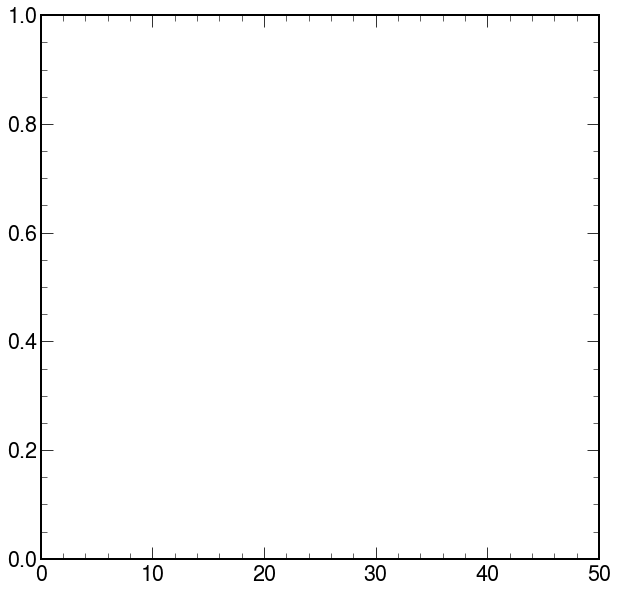

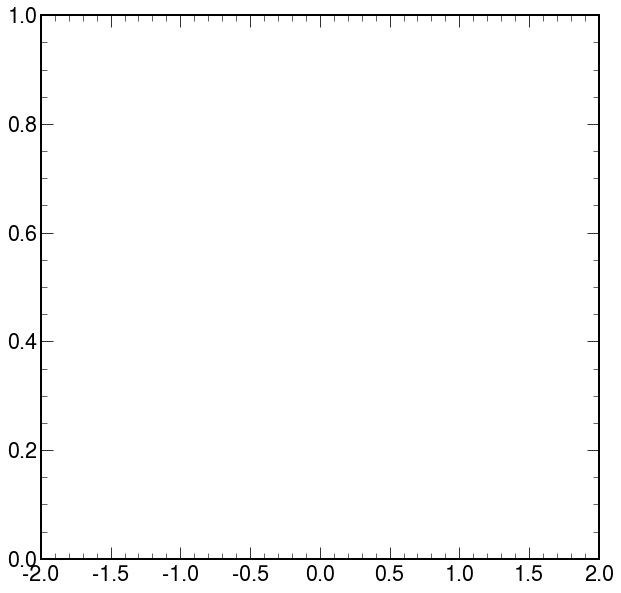

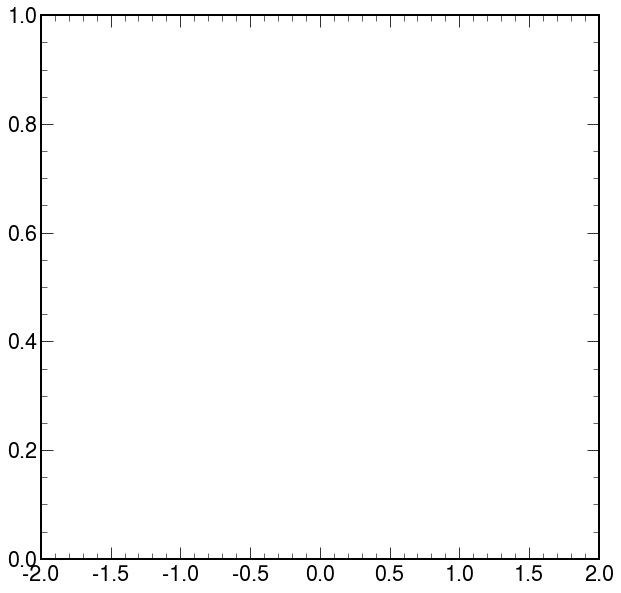

In [9]:
lepton = 'electron'#'muon' or 'electron'
isdata = 'mc'#'data' or 'mc'
output_dir = f'newid_fake_rate_hist'
mkdir(output_dir)

# ptbins=np.array([10,20,25,30,35,45])
# etabins=np.array([0,1.0,1.5,2.0,2.5])

ptbins=np.linspace(0,50,100+1)
etabins=np.linspace(0,3,100+1)

loose_hist_pt = yty_histplot('loose_pt',1,ptbins)
tight_hist_pt = yty_histplot('tight_pt',1,ptbins)

gen_weight_loose_hist = yty_histplot('gen_weight_loose',1,np.linspace(-2,2,100+1))
gen_weight_tight_hist = yty_histplot('gen_weight_loose',1,np.linspace(-2,2,100+1))

for isdata in ['mc','data']:
# for isdata in ['mc']:
    if isdata=='mc':
        MC_list = ['WJets','DYJetsToLL_M-10to50','DYJetsToLL_M-50']
    else:
        MC_list = [1]
    for MC in MC_list:#'WJets','DYJetsToLL_M-10to50','DYJetsToLL_M-50'
        if lepton=='electron' and isdata=='data':
            data_nanoAOD_dir_list = ['/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/EGamma/Run2018A-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/EGamma/Run2018B-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/EGamma/Run2018C-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/EGamma/Run2018D-02Apr2020-v1/NANOAOD']
        elif lepton=='muon' and isdata=='data':
            data_nanoAOD_dir_list = ['/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DoubleMuon/Run2018A-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DoubleMuon/Run2018B-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DoubleMuon/Run2018C-02Apr2020-v1/NANOAOD',
                                    '/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DoubleMuon/Run2018D-02Apr2020-v1/NANOAOD']
        else:
            if isdata=='mc':
                if MC=='WJets':
                    data_nanoAOD_dir_list = ['/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/NANOAODSIM']
                elif MC=='DYJetsToLL_M-50':
                    data_nanoAOD_dir_list = ['/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/NANOAODSIM']
                elif MC=='DYJetsToLL_M-10to50': 
                    data_nanoAOD_dir_list = ['/data/pubfs/pku_visitor/public_write/download/datasets/nanov7/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/NANOAODSIM']
                else:
                    print('wrong MC name')
                    data_nanoAOD_dir = ''
            else:
                print('!!!wrong lepton type!!!')
        if isdata=='data':
            array_dir = f'newid_{isdata}_{lepton}_fake_rate'
        else:
            array_dir = f'newid_{isdata}_{lepton}_fake_rate/{MC}'

        ntotal_file = len(os.listdir(array_dir))

        pwd = os.popen('pwd').readlines()[0].replace('\n','')

        nevents_after_cr_filter = 0
        nevents_pass = 0

        nevents_real_after_cr_filter = 0
        nevents_real_pass = 0

        loose_pt_array = []
        tight_pt_array = []
        if isdata=='mc':
            loose_weight_array = []
            tight_weight_array = []
            
            gen_loose_weight_array = []
            gen_tight_weight_array = []

        if isdata=='mc':
            if MC=='WJets':
                NGW = 70962104.5234375
                cross_section = 61526.7*1000
            elif MC=='DYJetsToLL_M-50':
                NGW = 100108282.765625
                cross_section = 6189.39*1000 
            elif MC=='DYJetsToLL_M-10to50':
                NGW = 39360042.234375
                cross_section = 18610*1000
            else:
                print('wrong MC name')
            if lepton=='muon':
                equivalent_lumi_highpt = 0.04578
                equivalent_lumi_lowpt = 0.00856
            else:
                equivalent_lumi_highpt = 0.03891
                equivalent_lumi_lowpt = 0.00641

            weight_highpt = cross_section*equivalent_lumi_highpt/NGW
            weight_lowpt = cross_section*equivalent_lumi_lowpt/NGW

        for i,rootfile in enumerate(os.listdir(array_dir)):
            print("\r", end="")
            if not os.path.exists(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'x_array'):
                print('%d/%d wrong'%(i+1, ntotal_file))
            else:
                if isdata=='data':
                    try:
                        x_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'x_array')
                        y_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'y_array')
                        loose_pt_array.append(y_array)
                        nevents_after_cr_filter += len(x_array)
                    except:
                        pass
                    try:
                        x_pass_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'x_pass_array')
                        y_pass_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'y_pass_array')
                        tight_pt_array.append(y_pass_array)
                        nevents_pass += len(x_pass_array)
                    except:
                        pass
                else:
                    try:
                        x_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'x_array')
                        y_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'y_array')
                        gen_weight_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'gen_weight_array')
                        if lepton=='electron':
                            weight_array = gen_weight_array*1*(y_array<25)*weight_lowpt + gen_weight_array*1*(y_array>=25)*weight_highpt
                        else:
                            weight_array = gen_weight_array*1*(y_array<20)*weight_lowpt + gen_weight_array*1*(y_array>=20)*weight_highpt

                        loose_pt_array.append(y_array)
                        loose_weight_array.append(weight_array)
                        gen_loose_weight_array.append(gen_weight_array)
                        nevents_after_cr_filter += len(x_array)
                        nevents_real_after_cr_filter += np.sum(weight_array)
                    except:
                        pass
                    try:
                        x_pass_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'x_pass_array')
                        y_pass_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'y_pass_array')
                        gen_weight_pass_array = ak.from_parquet(pwd+'/'+array_dir+'/'+str(i+1)+'/'+'gen_weight_pass_array')

                        if lepton=='electron':
                            weight_pass_array = gen_weight_pass_array*1*(y_pass_array<25)*weight_lowpt + gen_weight_pass_array*1*(y_pass_array>=25)*weight_highpt
#                             weight_pass_array = gen_weight_pass_array
                        else:
                            weight_pass_array = gen_weight_pass_array*1*(y_pass_array<20)*weight_lowpt + gen_weight_pass_array*1*(y_pass_array>=20)*weight_highpt
#                             weight_pass_array = gen_weight_pass_array

                        tight_pt_array.append(y_pass_array)
                        tight_weight_array.append(weight_pass_array)
                        gen_tight_weight_array.append(gen_weight_pass_array)
                        nevents_pass += len(x_pass_array)
                        nevents_real_pass += np.sum(weight_pass_array)
                    except:
                        pass
            print("Progress: %d/%d"%(i+1, ntotal_file),end="")
            print("\t(%d,%d)"%(nevents_after_cr_filter,nevents_pass),end="")
            if isdata=='mc':
                print("\t(%.2f,%.2f)"%(nevents_real_after_cr_filter,nevents_real_pass),end="")
            sys.stdout.flush()
        print()
        mkdir(output_dir)
        if isdata=='data':
            loose_hist_pt.append_values(lepton+'_data',loose_pt_array)
            tight_hist_pt.append_values(lepton+'_data',tight_pt_array)
        else:
            loose_hist_pt.append_values(lepton+f'_{MC}',loose_pt_array)
            tight_hist_pt.append_values(lepton+f'_{MC}',tight_pt_array)
            
            loose_hist_pt.append_weights(lepton+f'_{MC}',loose_weight_array)
            tight_hist_pt.append_weights(lepton+f'_{MC}',tight_weight_array)
            
            gen_weight_loose_hist.append_values(lepton+f'_{MC}',gen_loose_weight_array)
            gen_weight_tight_hist.append_values(lepton+f'_{MC}',gen_tight_weight_array)
        
#     if isdata=='data':
#         save(fr_hist,f"{output_dir}/{isdata}_{lepton}")
#         save(fr_hist_pass,f"{output_dir}/{isdata}_{lepton}_pass")
#     else:
#         save(fr_hist,f"{output_dir}/{isdata}_{lepton}_{MC}")
#         save(fr_hist_pass,f"{output_dir}/{isdata}_{lepton}_{MC}_pass")

# gen_weight_loose_hist.set_legend(legendbool=True)
# gen_weight_loose_hist.set_log()
# gen_weight_loose_hist.draw([f'{lepton}_{MC}' for MC in ['DYJetsToLL_M-10to50','DYJetsToLL_M-50','WJets']])

# gen_weight_tight_hist.set_legend(legendbool=True)
# gen_weight_tight_hist.set_log()
# gen_weight_tight_hist.draw([f'{lepton}_{MC}' for MC in ['DYJetsToLL_M-10to50','DYJetsToLL_M-50','WJets']])

draw  electron_WJets
draw  electron_DYJetsToLL_M-50
draw  electron_DYJetsToLL_M-10to50
Histplot:loose_pt	No weights saved in label "electron_data", use w=1 instead.
draw  electron_data


/data/pubfs/tyyang99/jupyter_files/pkutree/yty_hist_class.py:471: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.__ax.set_ylim([0,self.__auto_ylim_weight*max_bin])
/data/pubfs/tyyang99/jupyter_files/pkutree/yty_hist_class.py:471: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.__ax.set_ylim([0,self.__auto_ylim_weight*max_bin])


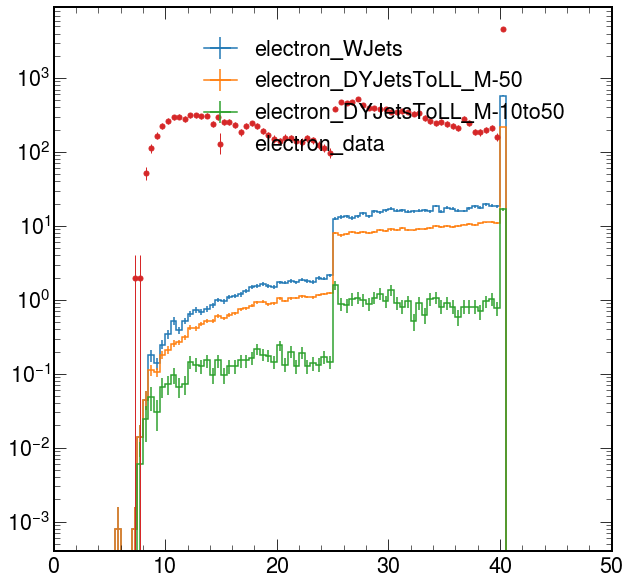

In [10]:
loose_hist_pt.set_legend(legendbool=True)
loose_hist_pt.set_log()
loose_hist_pt.draw([f'{lepton}_{MC}' for MC in ['DYJetsToLL_M-10to50','DYJetsToLL_M-50','WJets']], yerr_tf_list=[True,True,True],stack=True)
loose_hist_pt.draw(lepton+'_data',histtype_list=["errorbar"])

draw  electron_WJets
draw  electron_DYJetsToLL_M-50
draw  electron_DYJetsToLL_M-10to50
Histplot:tight_pt	No weights saved in label "electron_data", use w=1 instead.
draw  electron_data


/data/pubfs/tyyang99/jupyter_files/pkutree/yty_hist_class.py:471: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.__ax.set_ylim([0,self.__auto_ylim_weight*max_bin])
/data/pubfs/tyyang99/jupyter_files/pkutree/yty_hist_class.py:471: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.__ax.set_ylim([0,self.__auto_ylim_weight*max_bin])


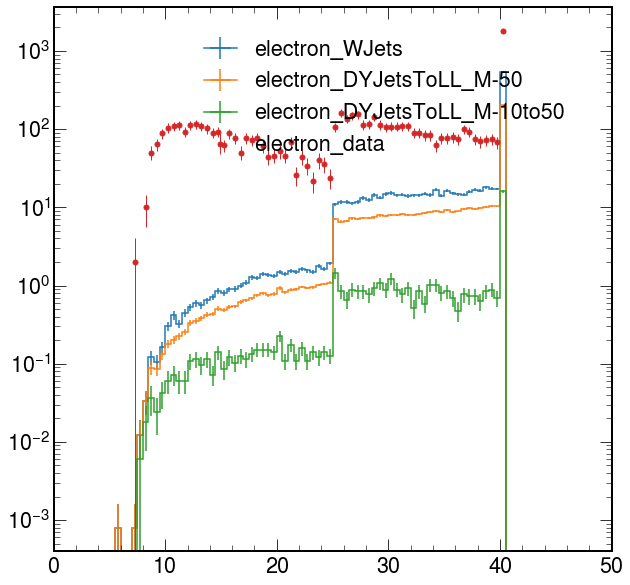

In [11]:
tight_hist_pt.set_legend(legendbool=True)
tight_hist_pt.set_log()
tight_hist_pt.draw([f'{lepton}_{MC}' for MC in ['DYJetsToLL_M-10to50','DYJetsToLL_M-50','WJets']],yerr_tf_list=[True,True,True],stack=True)
tight_hist_pt.draw(lepton+'_data',histtype_list=["errorbar"])

In [9]:
[f'{lepton}_{MC}' for MC in ['WJets','DYJetsToLL_M-10to50','DYJetsToLL_M-50']]

['muon_WJets', 'muon_DYJetsToLL_M-10to50', 'muon_DYJetsToLL_M-50']

In [28]:
gen_weight_pass_array*1*(x_pass_array<20)*weight_lowpt

<Array [0.000529, 0.000529, ... 0.000529] type='8413 * float32'>

In [29]:
x_pass_array<20

<Array [True, True, True, ... True, True, True] type='8413 * bool'>

In [30]:
x_pass_array

<Array [2.11, 1.18, 0.38, ... 1.25, 0.945] type='8413 * float32'>

In [ ]:
x_pass_array<20